## Scratch Implementation of K-nearest Neighbor

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

#### Here we will be using the pre-processed dataset from the sklearn library.

In [2]:
data = load_iris()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['target'] = pd.DataFrame(data.target)

### DataSet Visualization

In [3]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Classes Present in the Dataset

In [5]:
dataset.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

## Plotting the Dataset

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\praku\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species Count'}, xlabel='target', ylabel='count'>

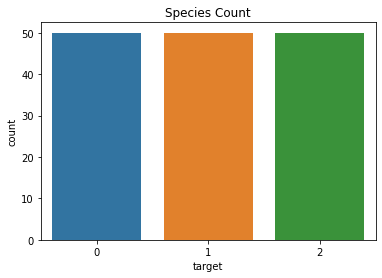

In [7]:

plt.title("Species Count")
sns.countplot(dataset["target"])

#### Uni-variate Analysis

c:\users\praku\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on sapel length and width'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

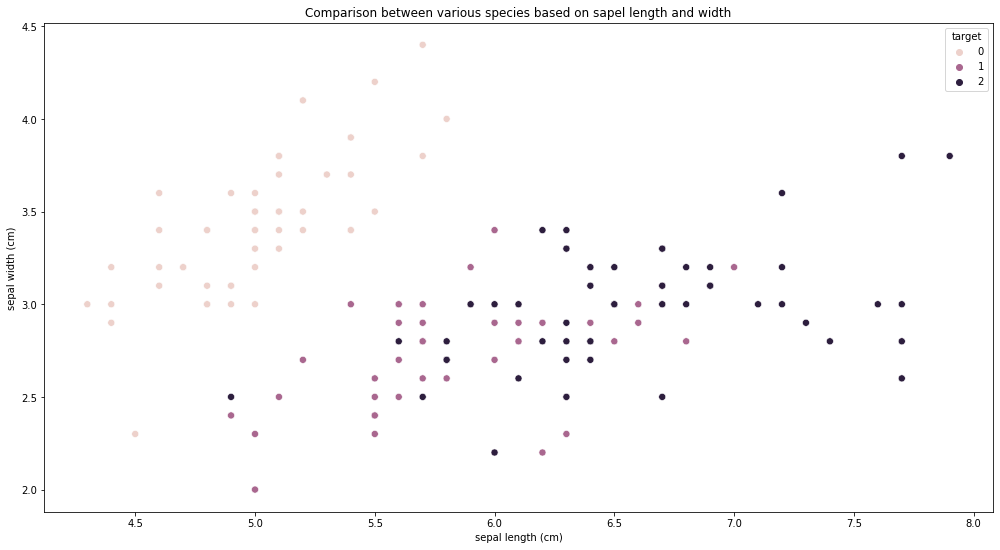

In [8]:
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(dataset["sepal length (cm)"],dataset["sepal width (cm)"],hue =dataset["target"],s=50)

#### Bi-Variate Analysis

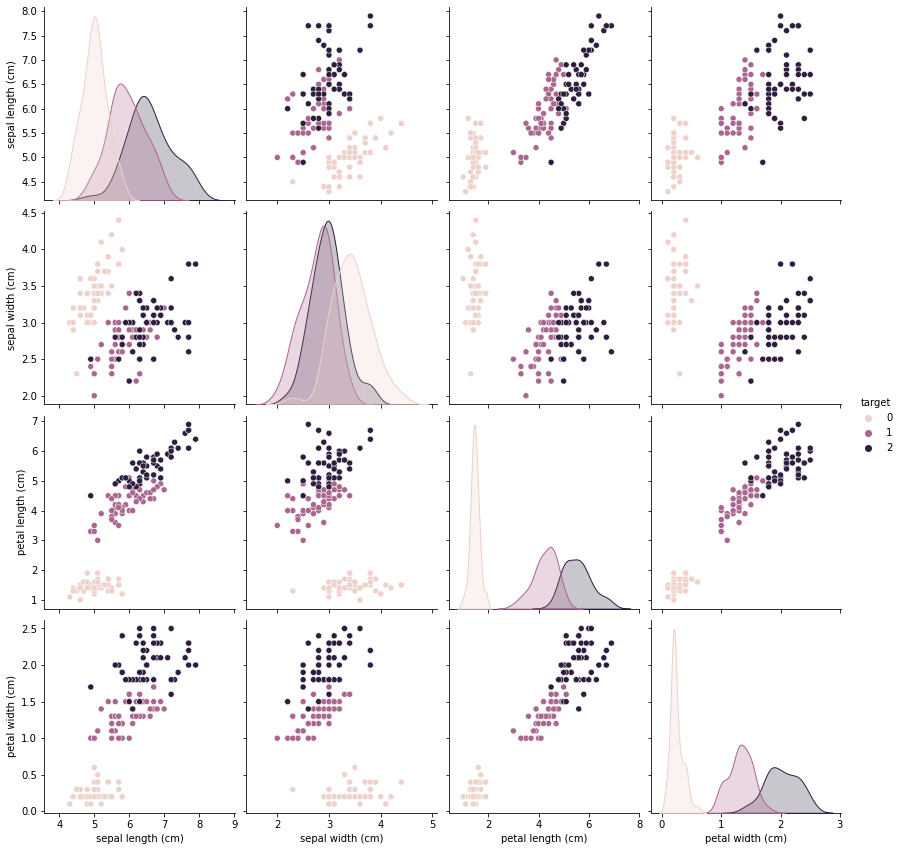

In [9]:
sns.pairplot(dataset, hue="target", height = 3)

### Calculation of the Eucledian Distance 

In [10]:
import math 

def eucledianDistance(data, sample, length):
    distance = 0
    for x in range(length):
        distance += pow(data[x] - sample[x],2)
    return math.sqrt(distance)


### Testing the Computed Function

In [11]:
data1 = [2,2,2,'a']
data2 = [4,4,4,'b']
distance = eucledianDistance(data1, data2, 3)
distance

3.4641016151377544

### Function To Fetch the Neighbours 

In [12]:
import operator 

def getNeighbors(X_train , X_test , k):
    distances = []
    length = len(X_test) - 1
    for x in range(len(X_train)):
        dist = eucledianDistance(X_test , X_train[x] , length)
        distances.append((X_train[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

### Finding out k nearest neighbours for the new data  

In [13]:
k = 11
trainset = dataset.values.tolist()
testInstance = [7,5,7]

neighbors = getNeighbors(trainset , testInstance , k)
print(neighbors)



[[7.7, 3.8, 6.7, 2.2, 2.0], [7.2, 3.6, 6.1, 2.5, 2.0], [5.7, 4.4, 1.5, 0.4, 0.0], [7.9, 3.8, 6.4, 2.0, 2.0], [5.8, 4.0, 1.2, 0.2, 0.0], [5.5, 4.2, 1.4, 0.2, 0.0], [6.7, 3.3, 5.7, 2.1, 2.0], [6.7, 3.3, 5.7, 2.5, 2.0], [6.3, 3.4, 5.6, 2.4, 2.0], [5.7, 3.8, 1.7, 0.3, 0.0], [6.2, 3.4, 5.4, 2.3, 2.0]]


### Finding the Class 

In [14]:
import operator
def findClass(neighbors):
    Votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in Votes:
            Votes[response] +=1
        else:
            Votes[response] = 1
    sortedVotes = sorted(Votes.items(), key = operator.itemgetter(1) , reverse = True)
    return sortedVotes[0][0]

In [15]:
response = findClass(neighbors)
print("The new instance falls on class : ",int(response))

The new instance falls on class :  2
